## Use Case Overview: 

The objective of this notebook is to predict the NYC home value price


In this notebook, we use:

- we use csv file that contains all the value required to predict the NYC home value price for model training.
- Data to test the model (make predictions).

**Features for Model Training**: Useful variables related to the sale price itself 

**Target to Predict**: The sale price

In [81]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

1. LOAD DATA

In [82]:
# Load the CSV file into a DataFrame
file_path = r"C:\Git\Stephanie\stephina\lessons\00-intro\nyc-rolling-sales.csv"

home_df = pd.read_csv(file_path, encoding="utf-8")


# Display the first few rows of the DataFrame
home_df.head()

,NO:,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,19-07-2017 00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,14-12-2016 00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,09-12-2016 00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,23-09-2016 00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,17-11-2016 00:00


In [83]:
# To find the no.of rows and columns
home_df.shape

(84548, 22)

In [84]:
# NAN values by column
home_df.isna().sum()

NO:                               0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [85]:
# NAN values by column
home_df.isna().sum()

NO:                               0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [86]:
# Total NAN values
home_df.isna().sum().sum()

0

In [87]:
# Get Column Names
print(home_df.columns)

Index(['NO:', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')


In [88]:
# Get Column data types
print(home_df.dtypes)

NO:                                int64
BOROUGH                            int64
NEIGHBORHOOD                      object
BUILDING CLASS CATEGORY           object
TAX CLASS AT PRESENT              object
BLOCK                              int64
LOT                                int64
EASE-MENT                         object
BUILDING CLASS AT PRESENT         object
ADDRESS                           object
APARTMENT NUMBER                  object
ZIP CODE                           int64
RESIDENTIAL UNITS                  int64
COMMERCIAL UNITS                   int64
TOTAL UNITS                        int64
LAND SQUARE FEET                  object
GROSS SQUARE FEET                 object
YEAR BUILT                         int64
TAX CLASS AT TIME OF SALE          int64
BUILDING CLASS AT TIME OF SALE    object
SALE PRICE                        object
SALE DATE                         object
dtype: object


In [89]:
home_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   NO:                             84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [90]:
home_df.dropna(inplace=True)

In [91]:
home_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   NO:                             84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

2. PREPROCESSING THE DATA

In [92]:
#To get any the unique values from "SALE PRICE" column
home_df['SALE PRICE'].unique()

array(['6625000', ' -  ', '3936272', ..., '408092', '11693337', '69300'],
      dtype=object)

In [93]:
def onehot_encode(home_df, columns, prefixes):
    home_df = home_df.copy()
    
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(home_df[column], prefix=prefix)
        home_df = pd.concat([home_df, dummies], axis=1)
        home_df = home_df.drop(column, axis=1)
    
    return home_df

In [96]:
# Assuming these are the columns you want to convert to numeric
numeric_columns = ['SALE PRICE', 'LAND SQUARE FEET', 'GROSS SQUARE FEET']

# Convert specific columns to numeric, coercing errors
home_df[numeric_columns] = home_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Replace '-' with NaN in the entire DataFrame
home_df = home_df.replace('-', np.nan)

In [98]:
home_df[['SALE PRICE', 'LAND SQUARE FEET', 'GROSS SQUARE FEET']]

,SALE PRICE,LAND SQUARE FEET,GROSS SQUARE FEET
0,6625000.0,1633.0,6440.0
1,NaN,4616.0,18690.0
2,NaN,2212.0,7803.0
3,3936272.0,2272.0,6794.0
4,8000000.0,2369.0,4615.0
...,...,...,...
84543,450000.0,2400.0,2575.0
84544,550000.0,2498.0,2377.0
84545,460000.0,4000.0,1496.0
84546,11693337.0,208033.0,64117.0


In [99]:
home_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   NO:                             84548 non-null  int64  
 1   BOROUGH                         84548 non-null  int64  
 2   NEIGHBORHOOD                    84548 non-null  object 
 3   BUILDING CLASS CATEGORY         84548 non-null  object 
 4   TAX CLASS AT PRESENT            84548 non-null  object 
 5   BLOCK                           84548 non-null  int64  
 6   LOT                             84548 non-null  int64  
 7   EASE-MENT                       84548 non-null  object 
 8   BUILDING CLASS AT PRESENT       84548 non-null  object 
 9   ADDRESS                         84548 non-null  object 
 10  APARTMENT NUMBER                84548 non-null  object 
 11  ZIP CODE                        84548 non-null  int64  
 12  RESIDENTIAL UNITS               

In [100]:
# Drop rows with null values
home_df = home_df.dropna()


In [101]:
home_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48244 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   NO:                             48244 non-null  int64  
 1   BOROUGH                         48244 non-null  int64  
 2   NEIGHBORHOOD                    48244 non-null  object 
 3   BUILDING CLASS CATEGORY         48244 non-null  object 
 4   TAX CLASS AT PRESENT            48244 non-null  object 
 5   BLOCK                           48244 non-null  int64  
 6   LOT                             48244 non-null  int64  
 7   EASE-MENT                       48244 non-null  object 
 8   BUILDING CLASS AT PRESENT       48244 non-null  object 
 9   ADDRESS                         48244 non-null  object 
 10  APARTMENT NUMBER                48244 non-null  object 
 11  ZIP CODE                        48244 non-null  int64  
 12  RESIDENTIAL UNITS               48244

In [102]:
# Remove duplicate the
# Assuming df is your DataFrame
home_df.drop_duplicates(inplace=True)

C:\Users\Stephanie\AppData\Local\Temp\ipykernel_21176\4031525877.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df.drop_duplicates(inplace=True)


In [103]:
home_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48244 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   NO:                             48244 non-null  int64  
 1   BOROUGH                         48244 non-null  int64  
 2   NEIGHBORHOOD                    48244 non-null  object 
 3   BUILDING CLASS CATEGORY         48244 non-null  object 
 4   TAX CLASS AT PRESENT            48244 non-null  object 
 5   BLOCK                           48244 non-null  int64  
 6   LOT                             48244 non-null  int64  
 7   EASE-MENT                       48244 non-null  object 
 8   BUILDING CLASS AT PRESENT       48244 non-null  object 
 9   ADDRESS                         48244 non-null  object 
 10  APARTMENT NUMBER                48244 non-null  object 
 11  ZIP CODE                        48244 non-null  int64  
 12  RESIDENTIAL UNITS               48244

3. PREPARE THE FEATURES AND TRAIN THE MODEL






In [108]:
# Convert 'SALE PRICE' to numeric, coercing errors to NaN
train_home_df['SALE PRICE'] = pd.to_numeric(train_home_df['SALE PRICE'], errors='coerce')

# Drop rows with NaN values in 'SALE PRICE' column
train_home_df = train_home_df.dropna(subset=['SALE PRICE'])

# Now, you can use describe() on the 'SALE PRICE' column
print(train_home_df['SALE PRICE'].describe())


count    5.600300e+04
mean     1.283111e+06
std      1.219524e+07
min      0.000000e+00
25%      2.250000e+05
50%      5.300000e+05
75%      9.500000e+05
max      2.210000e+09
Name: SALE PRICE, dtype: float64


C:\Users\Stephanie\AppData\Local\Temp\ipykernel_21176\2246450518.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_home_df['SALE PRICE'] = pd.to_numeric(train_home_df['SALE PRICE'], errors='coerce')


C:\Users\Stephanie\AppData\Local\Temp\ipykernel_21176\1889047026.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_home_df['SALE PRICE'], ax=ax);


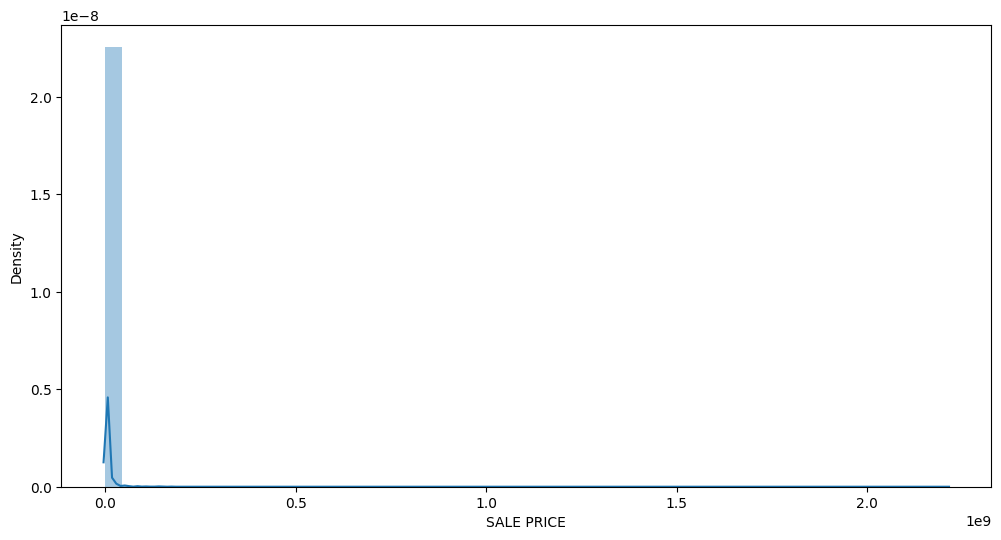

In [113]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)
sns.distplot(train_home_df['SALE PRICE'], ax=ax);

In [116]:
# Extract features and target
X = home_df[['BOROUGH', 'ZIP CODE', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
            'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE']]
y = home_df['SALE PRICE']

In [117]:
# Get categorical features
categorical_features = X.select_dtypes(['category', 'object']).columns
categorical_features

Index(['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT',
       'BUILDING CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE'],
      dtype='object')

In [118]:
# Get numeric features
numeric_features = X.select_dtypes(include='number').columns
numeric_features

Index(['BOROUGH', 'ZIP CODE'], dtype='object')

In [123]:
def encode_categorical_cols(home_df, categorical_cols):
    home_df[categorical_cols] = home_df[categorical_cols].astype("category")
    
    for col in categorical_cols:
        if home_df[col].dtype.name == 'category':
            home_df[col] = home_df[col].cat.codes
    
    return home_df

train_df = encode_categorical_cols(home_df, categorical_features)


C:\Users\Stephanie\AppData\Local\Temp\ipykernel_21176\1382971127.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df[categorical_cols] = home_df[categorical_cols].astype("category")
C:\Users\Stephanie\AppData\Local\Temp\ipykernel_21176\1382971127.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df[col] = home_df[col].cat.codes


In [124]:
from sklearn.feature_extraction import DictVectorizer

def extract_x_y(df, dv=None):
    categorical_cols = ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT',
                         'BUILDING CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE']
    
    dicts = df[categorical_cols].to_dict(orient="records")
    
    if dv is None:
        dv = DictVectorizer()
        dv.fit(dicts)
    
    X = dv.transform(dicts)
    y = df["SALE PRICE"].values
    
    return X, y, dv

X_train, y_train, dv = extract_x_y(train_df)


4. TRAIN THE MODEL

In [125]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
# ~ 2.5 minutes
rf = RandomForestRegressor(n_estimators=100, max_depth=11, max_features="sqrt", random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=11, max_features='sqrt', n_jobs=-1,
                      random_state=1)

In [131]:
from sklearn.metrics import mean_squared_error

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def compute_metrics(y, y_pred):
    metrics = {
        "rmse": mean_squared_error(y, y_pred, squared=False),
        "mape": mean_absolute_percentage_error(y, y_pred),
    }
    return metrics

In [132]:

y_pred_lr = lr.predict(X_train)
y_pred_rf = rf.predict(X_train)
compute_metrics(y_train, y_pred_lr), compute_metrics(y_train, y_pred_rf)

c:\Git\Anaconda\envs\myenv\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Stephanie\AppData\Local\Temp\ipykernel_21176\385809209.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
c:\Git\Anaconda\envs\myenv\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Stephanie\AppData\Local\Temp\ipykernel_21176\385809209.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


({'rmse': 13349889.132974412, 'mape': inf},
 {'rmse': 9606718.285527708, 'mape': inf})